In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,5])
y = np.array([2,3])
a = np.dot(x,y)
print(a)

17


In [3]:
d = 2*x + 2*y

In [4]:
print(d)

[ 6 16]


In [5]:
b = np.sqrt(x[0]**2+x[1]**2)
c = np.linalg.norm(x)
print(b, c)

5.0990195135927845 5.0990195135927845


In [6]:
theta_radians = np.arccos(np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y)))
theta_degrees = np.degrees(theta_radians)
print(theta_degrees)


22.380135051959567


In [7]:
A = np.array([[1, -1, 2], [0, -3, 4]], dtype=float)
u = np.array([2, 1, 3])
v = np.dot(A, u)
print(v)


[7. 9.]


### 2. Random Numbers and Univariate Distributions

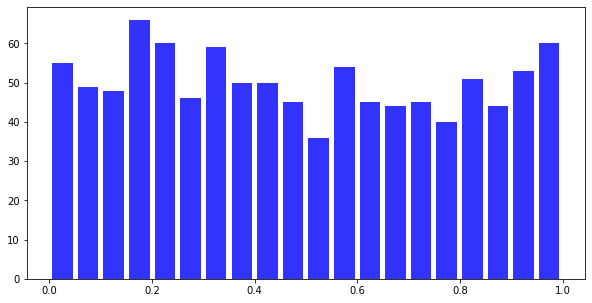

In [8]:
x = np.random.rand(1000, 1) #1d array of 1000 numbers
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(x, bins=20, color='b', alpha=0.8, rwidth=0.8)

In [9]:
MaxTrials = 10
NumSamples = 200
NumBins = 20
for trial in range(MaxTrials):
    x = np.random.rand(NumSamples, 1)
    counts, bins, patches = plt.hist(x, NumBins)
    plt.clf()
    print("Variation within bin counts: ", np.var(counts/NumSamples))


Variation within bin counts:  0.0001925
Variation within bin counts:  0.00020749999999999995
Variation within bin counts:  0.00020999999999999995
Variation within bin counts:  0.0002775000000000001
Variation within bin counts:  0.0001475
Variation within bin counts:  0.000145
Variation within bin counts:  0.00024000000000000003
Variation within bin counts:  0.00019500000000000002
Variation within bin counts:  0.00026000000000000003
Variation within bin counts:  0.00031500000000000007


<Figure size 432x288 with 0 Axes>

In [10]:
MaxTrials = 10
NumSamples = 200
NumBins = 20
for trial in range(MaxTrials):
    x = np.random.rand(1000, 1)
    counts, bins, patches = plt.hist(x, NumBins)
    plt.clf()
    print("Variation within bin counts: ", np.var(counts/NumSamples))


Variation within bin counts:  0.0009950000000000002
Variation within bin counts:  0.0007550000000000002
Variation within bin counts:  0.0007950000000000002
Variation within bin counts:  0.0016049999999999994
Variation within bin counts:  0.000865
Variation within bin counts:  0.001215
Variation within bin counts:  0.0008950000000000002
Variation within bin counts:  0.0012774999999999998
Variation within bin counts:  0.0008274999999999999
Variation within bin counts:  0.0015374999999999998


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Histogram')

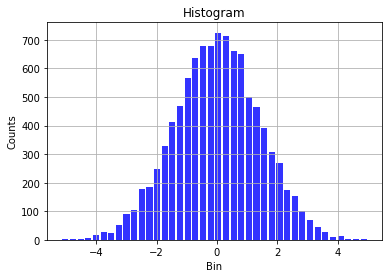

In [11]:
N = 10000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = sum(np.random.rand(12, 1)) - np.sum(np.random.rand(12, 1));
plt.hist(x1, 40, color="b", alpha=0.8, rwidth=0.8)
plt.xlabel("Bin")
plt.ylabel("Counts")
plt.grid(True)
plt.title("Histogram")

### 3. Uncertainty in Estimation


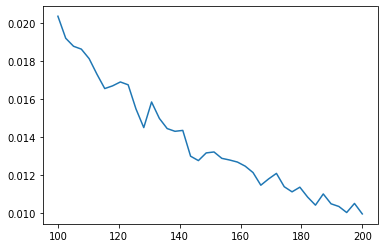

In [12]:
sampleSizeRange = np.linspace(100,200,40)
plotVar = np.zeros(len(sampleSizeRange))

for sSize in range(len(sampleSizeRange)):
    numSamples = np.int(sampleSizeRange[sSize])
    MaxTrial = 2000
    vStrial = np.zeros(MaxTrial)
    
    for trial in range(MaxTrial):
        xx = np.random.randn(numSamples,1)
        vStrial[trial] = np.var(xx)
    
    plotVar[sSize] = np.var(vStrial)

plt.plot(sampleSizeRange, plotVar)
    

### 4. Bivariate Gaussian Distribution

In [13]:
def gauss2D(x,m,C):
    c1 = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T,np.dot(C1, (x-m))))
    den = 2 * np.pi * dC
    
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    x = np.linspace(-5,5,nx)
    y = np.linspace(-5,5,ny)
    X, Y = np.meshgrid(x,y, indexing = 'ij')
    
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m , C)
    return X,Y,Z

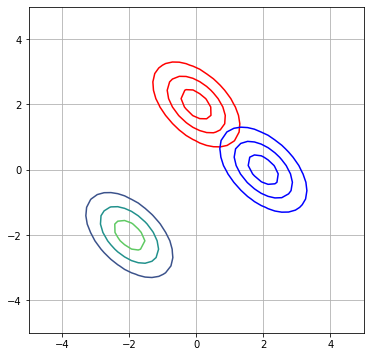

In [14]:
nx, ny = 50 ,40
plt.figure(figsize=(6,6))

#mean of two distributions
m1 = np.array([0,2])
#covariant matrix
C1 = np.array([[2,1],[1,2]],np.float32)
Xp,Yp,Zp = twoDGaussianPlot(nx,ny,m1,C1)

#Another two bivariate Gaussian Distributions
m2 = np.array([2,0])
C2 = np.array([[2,-1],[-1,2]],np.float32)
Xp2,Yp2,Zp2 = twoDGaussianPlot(nx,ny,m2,C2)

m3 = np.array([-2,-2])
C3 = np.array([[2,0],[0,2]],np.float32)
Xp3,Yp3,Zp3 = twoDGaussianPlot(nx,ny,m3,C3)

plt.contour(Xp,Yp,Zp,3,colors='red')
plt.contour(Xp2,Yp2,Zp2,3,colors='blue')
plt.contour(Xp3,Yp3,Zp3,3)

plt.grid(True)

### 5. Sampling from a Multivariate Gaussian Distribution

In [15]:
C = [[2,1],[1,2]]
print(C)
A = np.linalg.cholesky(C)
print(A)
#matrix multiplication - @
print(A @ A.T)

[[2, 1], [1, 2]]
[[1.41421356 0.        ]
 [0.70710678 1.22474487]]
[[2. 1.]
 [1. 2.]]


In [16]:
X = np.random.randn(10000,2)
Y = X @ A 
print(X.shape)
print(Y.shape)

(10000, 2)
(10000, 2)


Text(0.5, 1.0, 'Scatter of Isotropic and Correlated Gaussian Densities')

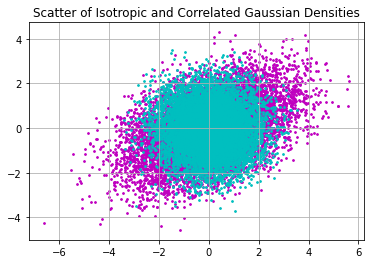

In [17]:
plt.scatter(Y[:,0],Y[:,1], s=3, c='m')
plt.scatter(X[:,0],X[:,1], s=3, c='c')
plt.grid(True)
plt.title("Scatter of Isotropic and Correlated Gaussian Densities")

### 6. Distribution of Projections


In [18]:
#Construct a vector u = [sin θ cos θ], parameterized by the variable θ.
theta = np.pi / 3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Sum of squares: ", u[0]**2 + u[1]**2)
print("Degrees: ", theta*180 / np.pi)

The vector:  [0.8660254037844386, 0.5000000000000001]
Sum of squares:  1.0
Degrees:  59.99999999999999


In [19]:
#Compute the variance of projections of the data in X along this direction:
yp = Y @ u
print(yp.shape)
print("Projected Variance: ", np.var(yp))

(10000,)
Projected Variance:  2.9869333436206498


In [20]:
#Plot how this projected variance changes as a function of θ:
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)

for n in range(nPoints):
    theta = thRange[n]
    u = [np.sin(theta), np.cos(theta)]
    yp = Y @ u
    pVars[n] = np.var(yp)


Text(0, 0.5, 'Variance of Projections')

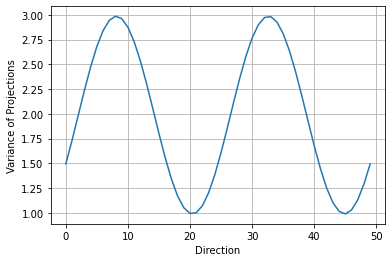

In [21]:
plt.plot(pVars)
plt.grid(True)
plt.xlabel("Direction")
plt.ylabel("Variance of Projections")

In [22]:
w ,v = np.linalg.eig(C)
print(v)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
